In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

# Quantized model: Prediction Statistics

In [2]:
with open('../predictions/prediction.json') as fd:
   predictions = json.load(fd)

In [3]:
predictions

[{'predicted_img_id': 143961,
  'bison_id': 0,
  'high_similarity': 0.27862799167633057,
  'low_similarity': 0.206569105386734},
 {'predicted_img_id': 369373,
  'bison_id': 1,
  'high_similarity': 0.3493160307407379,
  'low_similarity': 0.3250684440135956},
 {'predicted_img_id': 252147,
  'bison_id': 2,
  'high_similarity': 0.28717464208602905,
  'low_similarity': 0.21188226342201233},
 {'predicted_img_id': 172616,
  'bison_id': 3,
  'high_similarity': 0.28766292333602905,
  'low_similarity': 0.26867565512657166},
 {'predicted_img_id': 111448,
  'bison_id': 4,
  'high_similarity': 0.32057619094848633,
  'low_similarity': 0.2641327381134033},
 {'predicted_img_id': 190595,
  'bison_id': 5,
  'high_similarity': 0.31566762924194336,
  'low_similarity': 0.28529101610183716},
 {'predicted_img_id': 361245,
  'bison_id': 6,
  'high_similarity': 0.32766491174697876,
  'low_similarity': 0.29379749298095703},
 {'predicted_img_id': 76896,
  'bison_id': 7,
  'high_similarity': 0.3315869867801666,
 

In [10]:
def plot_high_similarity(data, title, xlabel, ylabel):
    # Extract high similarity values
    high_similarity_values = [item['high_similarity'] for item in data]
    # Calculate mean and standard deviation
    mean_value = np.mean(high_similarity_values)
    std_dev_value = np.std(high_similarity_values)
    print(f'Mean: {mean_value} and SD: {std_dev_value}')
    # Create histogram with Seaborn
    sns.distplot(high_similarity_values, kde=False)
    # Plot mean and standard deviation lines
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=mean_value+std_dev_value, color='g', linestyle='--', label='Mean + SD: {:.2f}'.format(mean_value+std_dev_value))
    plt.axvline(x=mean_value-std_dev_value, color='g', linestyle='--', label='Mean - SD: {:.2f}'.format(mean_value-std_dev_value))

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display plot
    plt.legend()
    plt.show()

Mean:  0.31
 SD:  0.03
 min:  0.16 
 max: 0.43


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_54547/2364301252.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


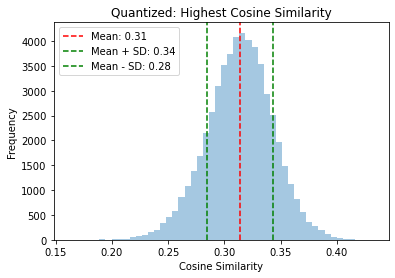

In [11]:
plot_high_similarity (
    data= predictions,
    title='Quantized: Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

In [12]:
def extract_discriminated_similarities (data):
    high_similarity = [s_h['high_similarity'] for s_h in data]
    low_similarity = [s_l['low_similarity']for s_l in data]
    np_high_similarity_values = np.array(high_similarity)
    np_low_similarity_values = np.array(low_similarity)
    similarity_difference = np_high_similarity_values - np_low_similarity_values

    return similarity_difference

def plot_similarity_difference(similarity_difference,
                               title,
                               xlabel):

    # Calculate mean and standard deviation
    mean_value = np.mean(similarity_difference)
    std_dev_value = np.std(similarity_difference)
    print(f'Mean: {mean_value} and SD: {std_dev_value}')
    # Create histogram with Seaborn
    sns.histplot(data=similarity_difference, kde=False, bins=20)
    # Plot mean and standard deviation lines
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=mean_value+std_dev_value, color='g', linestyle='--', label='Mean + SD: {:.2f}'.format(mean_value+std_dev_value))
    plt.axvline(x=mean_value-std_dev_value, color='g', linestyle='--', label='Mean - SD: {:.2f}'.format(mean_value-std_dev_value))

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)


    # Display plot
    plt.legend()
    plt.show()


Mean: 0.04312186586944843 and SD: 0.03569007156747766


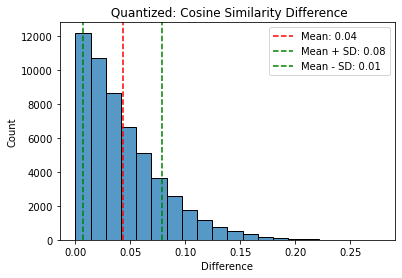

In [363]:
# Cosine similarity difference across correct and wrong predictions.
plot_similarity_difference(
    similarity_difference =  extract_discriminated_similarities(predictions),
    title= ' Quantized: Cosine Similarity Difference',
    xlabel= 'Difference',)

## Analysis of correct and wrong predictions separetely

In [13]:
with open('../predictions/correct_predictions.json') as fd:
   correct_predictions = json.load(fd)

with open('../predictions/wrong_predictions.json') as fd:
    wrong_predictions = json.load(fd)

In [14]:
print(f'Number of correct predictions: {len(correct_predictions)}. Number of wrong predictions: {len(wrong_predictions)}.Total number of predictions: {len(correct_predictions)+len(wrong_predictions)}')

Number of correct predictions: 43747. Number of wrong predictions: 10506.Total number of predictions: 54253


### Correct predictions

Mean:  0.32
 SD:  0.03
 min:  0.16 
 max: 0.43


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_54547/2364301252.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


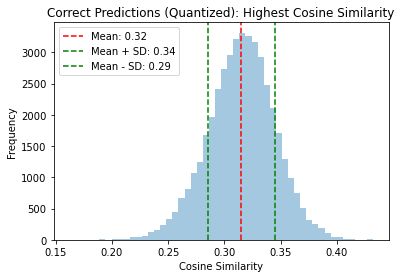

In [15]:
plot_high_similarity (
    data= correct_predictions,
    title='Correct Predictions (Quantized): Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

Mean: 0.04897812506863138 and SD: 0.03658603435202154


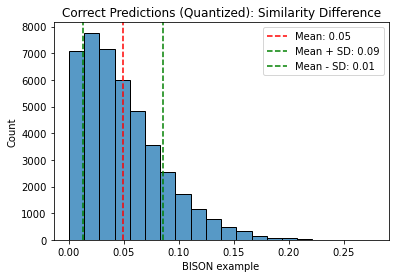

In [367]:
# difference between high_similarity and low_similarity among the correct predictions.
plot_similarity_difference(
    similarity_difference =  extract_discriminated_similarities(correct_predictions),
    title= 'Correct Predictions (Quantized): Similarity Difference',
    xlabel= 'BISON example',

)

### Wrong predictions

Mean: 0.30777458670126606 and SD: 0.028159172389550093


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_5506/4242669185.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


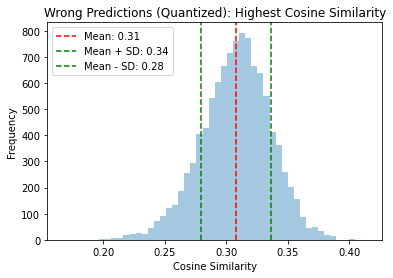

In [368]:
plot_high_similarity (
    data= wrong_predictions,
    title='Wrong Predictions (Quantized): Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

Min value: 3.874301910400391e-06
Max value: 0.12347625195980072
Mean: 0.018736393645323503
SD: 0.016330196103941375


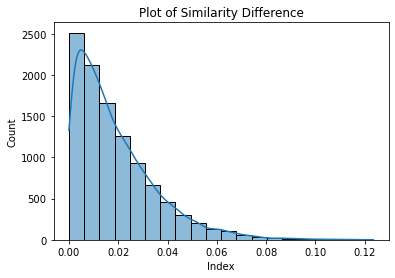

In [148]:
plot_similarity_difference(
    similarity_difference =  extract_discriminated_similarities(wrong_predictions),
    title= 'Plot of Similarity Difference',
    xlabel= 'Index',

)